# **Predict Default Loans Data Exploration**

Credit Lending aims to determine the credit risk and the status of the loans approved. The dataset used for this project is taken from Lending Club. It consists of 52 features and around 42K instances spaaning over 5 years from 2007-2011. The target feature is Loan Status which describes if the loan has been fully paid/current, charged off/defaulted.

This notebook aims to explore and understand the dataset by generating visuals between the features and the target label. The following questions are answered in this EDA notebook.

1.   Check the distribution of the descriptive features: Loan amount, funded amount, interest rate and DTI
2.   What is the average loan amount approved and the recoveries made per year based on term?
3.   How does grad, emp_length, purpose, home ownership, term affect the loan amount and interest rate and to study the recoveries collected every year.
4.   How does grade, sub grade, term, verification status affect if the loans are fully paid or charged off?
5.   Determine the ratio of fully paid to charged off loans with loan amount and interest rates in different states in the USA.






**Import all the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

**Load the data**

In [2]:
loan = pd.read_csv("loans_data.csv")

**Print the dataset to analyse the columns and their data types**

It is seen the dataset has 52 features and more 42K instances. There are 7 categorical features, 42 numerical features, and 3 datetime features.

In [3]:
#display the data
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [4]:
#check the size of the data
print("The lenght of the data:",len(loan))

The lenght of the data: 42538


In [5]:
#columns present in the data
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [6]:
#statistics of numerical data
loan.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,4.253500e+04,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42506.000000,42506.000000,...,42535.000000,42535.000000,42535.000000,42390.0,42535.0,42506.000000,42390.0,42506.000000,41170.000000,42430.000000
mean,8.257026e+05,11089.722581,10821.585753,10139.830603,322.623063,6.913656e+04,13.373043,0.152449,1.081424,9.343951,...,99.760718,13.858267,2610.756511,0.0,1.0,0.000094,0.0,0.143039,0.045227,0.000024
std,2.795409e+05,7410.938391,7146.914675,7131.686446,208.927216,6.409635e+04,6.726315,0.512406,1.527455,4.496274,...,716.220266,159.360372,4385.636417,0.0,0.0,0.009700,0.0,29.359579,0.208737,0.004855
min,7.047300e+04,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,6.384795e+05,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,0.000000,6.000000,...,0.000000,0.000000,211.460000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
50%,8.241780e+05,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,13.470000,0.000000,1.000000,9.000000,...,0.000000,0.000000,526.150000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
75%,1.033946e+06,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04,18.680000,0.000000,2.000000,12.000000,...,0.000000,0.000000,3165.450000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
max,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,33.000000,47.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,1.000000,0.0,6053.000000,2.000000,1.000000


**Data Preprocessing**

In [7]:
#Remove the % from the interest rate column to convert it to numerical data type.
loan['int_rate'] = loan['int_rate'].astype(str).map(lambda x: x.rstrip('%')).astype(float)

#Remove months from the term column to make it an int data type.
loan["term"] = loan["term"].map({"36 months" : 36, "60 months" : 60}).astype("Int64")

In [8]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,...,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,...,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,...,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,...,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60,12.69,67.79,B,B5,...,67.79,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [9]:
#Check the different loan status available in the dataset
loan["loan_status"].value_counts()

Fully Paid                                             33136
Charged Off                                             5634
Does not meet the credit policy. Status:Fully Paid      1988
Current                                                  961
Does not meet the credit policy. Status:Charged Off      761
Late (31-120 days)                                        24
In Grace Period                                           20
Late (16-30 days)                                          8
Default                                                    3
Name: loan_status, dtype: int64

I am concentrating on predicting loans that are either fully paid/current and charged off/default. Also, the loan statuses with Late (16-30 days), In Grace Period, Late (31-120 days) have less instances and the values have been dropped from the dataset. Rest of the values are Current and Does not meet the credit policy. Status:Fully Paid are combined to Fully Paid and Default and Does not meet the credit policy. Status:Charged off are combined to Charged off.

In [10]:
#drop rows with Late (16-30 days), In Grace Period, Late (31-120 days) status
loan_stat = ["Late (16-30 days)","In Grace Period","Late (31-120 days)"]
for stat in loan_stat:
    loan.drop(loan[loan["loan_status"] == stat].index,inplace = True)

In [11]:
#map the status to fully paid and charged off
loan["loan_status"] = loan["loan_status"].map({"Default":"Charged Off", "Does not meet the credit policy. Status:Charged Off": 
                                               "Charged Off", "Current":"Fully Paid","Does not meet the credit policy. Status:Fully Paid"
                                               :"Fully Paid", "Fully Paid":"Fully Paid","Charged Off":"Charged Off" })

**Distribution for the features**

Lets check the distribution of the features: Loan amount, funded amount, interest rate and DTI

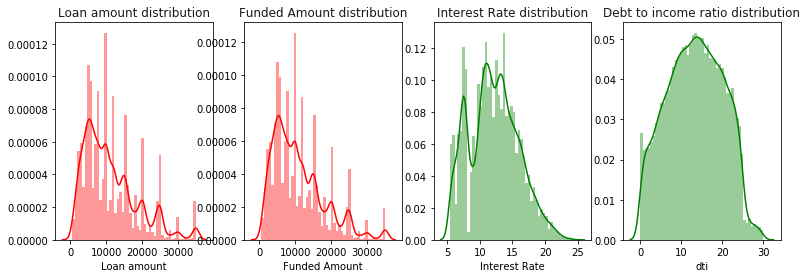

In [12]:
#distribution of loan amount
fig, axs = plt.subplots(ncols = 4)
loan_amnt_ax = sns.distplot(loan["loan_amnt"].dropna(), ax = axs[0], color = "red")
loan_amnt_ax.set_title('Loan amount distribution', fontsize = 12, color = "black", alpha = 0.9)
loan_amnt_ax.set(xlabel = 'Loan amount')
loan_amnt_ax.figure.set_size_inches(10,4)

#distribution of funded amount
int_rate_ax = sns.distplot(loan["funded_amnt"].dropna(), ax = axs[1], color = "red")
int_rate_ax.set_title('Funded Amount distribution', fontsize = 12, color = "black", alpha = 0.9)
int_rate_ax.set(xlabel = 'Funded Amount')
int_rate_ax.figure.set_size_inches(13,4)

#distribution of interest rate
int_rate_ax = sns.distplot(loan["int_rate"].dropna(), ax = axs[2], color = "green")
int_rate_ax.set_title('Interest Rate distribution', fontsize = 12, color = "black", alpha = 0.9)
int_rate_ax.set(xlabel = 'Interest Rate')
int_rate_ax.figure.set_size_inches(13,4)

#distribution of DTI
annual_inc_ax = sns.distplot(loan["dti"].dropna(), ax = axs[3], color = "green")
annual_inc_ax.set_title('Debt to income ratio distribution', fontsize = 12, color = "black", alpha = 0.9)
annual_inc_ax.set(xlabel = 'dti')
annual_inc_ax.figure.set_size_inches(13,4)

From the above distribution:

1. The loan amount is ranged between 5,000 - 20,000 dollars.
2. The loan amount and funded amount distribution are similar concluding that most of the borrowers who are qualified recieve the applied loan amount.
3. The interest rates for the loans is mainly from 5-15%.

**Loans approved and Recoveries made per year based on term**

1. An interesting point to note is from 2007-2009 all loans approved were for 36 months only. 
2. The graph shows the loans approved for 36 months are higher compared to 60 months from 2010 onwards. 
3. However the number of loans approved has increased about two times every year compared to its previous year.
4. The recoveries made during 2007 was the highest which reduced greatly for 36 months term over the years where as for 60months the recoveries increased from 2010 to 2011.

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
0  1077501  1296599.0     5000.0       5000.0           4975.0    36   
1  1077430  1314167.0     2500.0       2500.0           2500.0    60   
2  1077175  1313524.0     2400.0       2400.0           2400.0    36   
3  1076863  1277178.0    10000.0      10000.0          10000.0    36   
4  1075358  1311748.0     3000.0       3000.0           3000.0    60   

   int_rate  installment grade sub_grade  ... last_credit_pull_d  \
0     10.65       162.87     B        B2  ...           Jun-2016   
1     15.27        59.83     C        C4  ...           Sep-2013   
2     15.96        84.33     C        C5  ...           Jun-2016   
3     13.49       339.31     C        C1  ...           Apr-2016   
4     12.69        67.79     B        B5  ...           Jun-2016   

  collections_12_mths_ex_med policy_code  application_type acc_now_delinq  \
0                        0.0         1.0        INDIVIDUAL            0.0   
1   

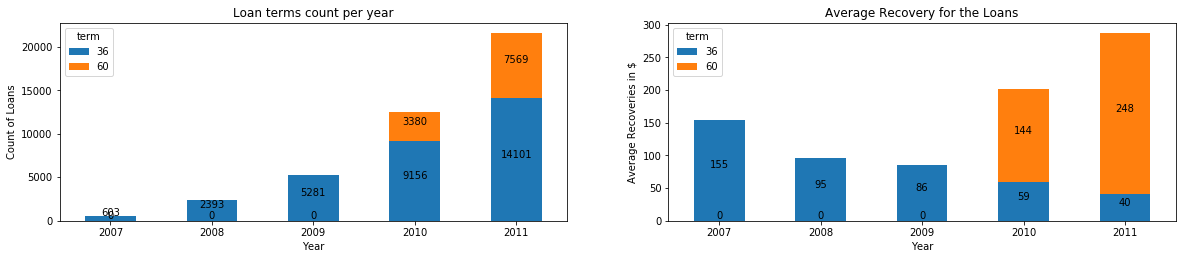

In [13]:
#extract year from date
loan["year"] = pd.to_datetime(loan["issue_d"]).dt.year.astype("Int64")
print(loan.head())
#groupby year and term
term_per_year = loan.groupby(['year',"term"]).size()

#calculate the mean recoveries per year and term
recovery_by_year = loan.groupby(['year',"term"])["recoveries"].mean()

#plot the graph
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

#year/term v/s average loan amount
ax_loan = term_per_year.unstack().plot(kind = "bar",stacked = True, rot = 0, ax = ax1, legend = True, figsize = (20,8))
ax1.title.set_text("Loan terms count per year")
ax1.set_xlabel('Year')
ax1.set_ylabel('Count of Loans')

#bar toppers
for p in ax_loan.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax_loan.text(x + width/2, 
                 y + height/2, 
                 '{:.0f}'.format(height), 
                 horizontalalignment = 'center',
                 verticalalignment = 'bottom')

#year/term v/s recoveries
ax_recovry = recovery_by_year.unstack().plot(kind = "bar",stacked = True, rot = 0, ax = ax2, legend = True, figsize = (20,8))
ax2.title.set_text("Average Recovery for the Loans")
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Recoveries in $')

#bar toppers
for p in ax_recovry.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax_recovry.text(x + width/2, 
                    y + height/2, 
                    '{:.0f}'.format(height), 
                    horizontalalignment = 'center',
                    verticalalignment = 'bottom')

plt.show()

**Loans approved and Interest rates per grade**

LendingClub assigns a grades (A–C) and sub-grades (1-5) to each member, which reflects LendingClub’s assessment of the credit risk of the corresponding loan. For example, if the borrower has a weaker credit profile they would get a lower grade and sub-grade, like C5. If the borrower has a stronger credit history, they’d get a higher grade and sub-grade, like A1 or B1. 

The interest rate varies depending on the credit risk of the corresponding loan. So higher grades (higher credit quality) come with lower interest rates. Lower grades come with higher interest rates.

Lets plot the loan amount and interest rate for grades and subgrades to see if the above points holds good for the given data.

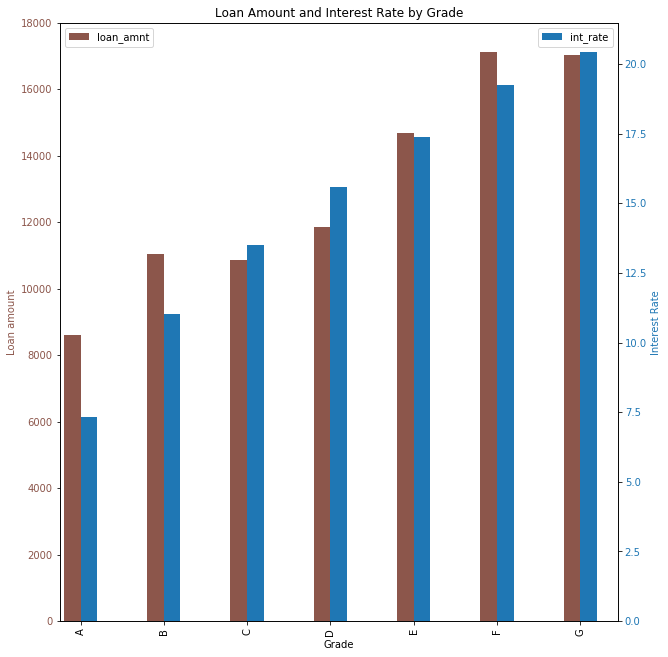

In [14]:
#group grade and loan amount
grade_loan_amt = loan.groupby(['grade'])[["loan_amnt"]].mean()

#group grade and interest rate
grade_int_rate = loan.groupby(['grade'])[["int_rate"]].mean()

#plot the figure
fig = plt.figure()
ax1 = fig.add_subplot(111)
width = 0.2

plt.title("Loan Amount and Interest Rate by Grade")

x_color = "black"
ax1.set_xlabel('Grade', color = x_color)
ax1.tick_params(axis = 'x', labelcolor = x_color)

color = 'tab:brown'
ax1.set_ylabel('Loan amount', color = color)
grade_loan_amt.plot(kind = "bar", color = color,width = width, ax = ax1, position = 1, figsize = (10,11))
ax1.tick_params(axis = 'y', labelcolor = color)
ax1.legend(loc = 2)

#create a twin axis
ax2 = ax1.twinx() 

color1 = "tab:blue"
ax2.set_ylabel('Interest Rate', color = color1) 
ax1.set_xlabel('Grade', color = x_color)
grade_int_rate.plot(kind = "bar", color = color1, width = width, ax = ax2, position = 0,figsize = (10,11))
ax2.tick_params(axis = 'y', labelcolor = color1)
ax2.legend(loc = 1)

plt.show()

This above graph shows how grade affects the loan amount and interest rates for the approved loans. 

1. The average loan amount is highest for Grade F and lowest for Grade A.
2. The interest rate is least at 7.5% for Grade A with highest of about 20% for the lowest grade G. The interest rate varies as given in the Lending Club website.

**Number of loans fully paid based on grade and sub grade**



Text(0, 0.5, 'Count')

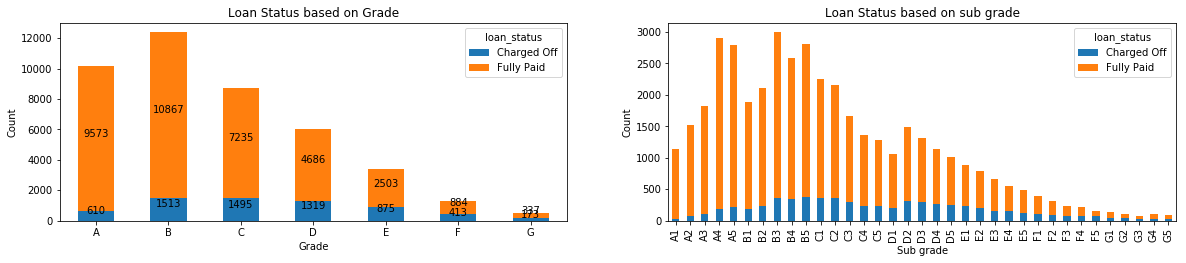

In [15]:
#group grade and loan status
loan_stat_grade = loan.groupby(['grade',"loan_status"]).size()

#group sub grade and loan status
loan_stat_sub_g = loan.groupby(['sub_grade',"loan_status"]).size()

#plot the figure
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

#plot grade and loan status
grade_plt = loan_stat_grade.unstack().plot(kind = "bar",stacked = True, rot = 0, ax = ax1,figsize = (20,8))
ax1.title.set_text("Loan Status based on Grade")
ax1.set_xlabel('Grade')
ax1.set_ylabel('Count')

#bar toppers for grade and loan status
for p in grade_plt.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    grade_plt.text(x + width/2, 
                  y + height/2, 
                  '{:.0f}'.format(height), 
                  horizontalalignment = 'center',
                  verticalalignment = 'bottom')

#plot sub grade and loan status
loan_stat_sub_g.unstack().plot(kind = "bar",stacked = True,ax = ax2,figsize = (20,8))
ax2.title.set_text("Loan Status based on sub grade")
ax2.set_xlabel('Sub grade')
ax2.set_ylabel('Count')

The graph shows the number of loans approved is high if the borrower has a good grade. From the grades graph the percentage of fully paid loans for each grade are: 

Grade A: 94%,
Grade B: 87%,
Grade C: 82%,
Grade D: 78%,
Grade E: 74%,
Grade F: 68%,
Grade G: 66%

This shows the higher grade borrowers tend to pay their loans fully compared to low level grades. This shows that low level graders are subjected to risk when approving their loans.

**Percentage of fully paid and charged off loans in the data set**

The Fully paid loans are around 85% while the charged off loans are 15%. This make the dataset highly imbalanced with respect to the target feature.

Text(0.5, 1.0, 'Loan Status percentage in the Lending Club Data')

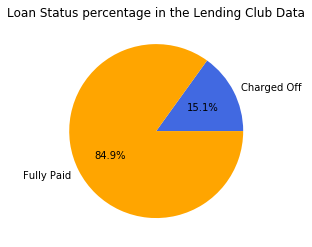

In [16]:
#group loan status by id
loan_stat = loan.groupby(['loan_status'])["id"].count()

#plot the percentage of loan status
loan_stat.plot(kind = "pie", subplots= True, colors = ["royalblue","orange"],autopct = '%1.1f%%', legend = False)
plt.axis('off')
plt.title("Loan Status percentage in the Lending Club Data")

**Loan status based on verification status**

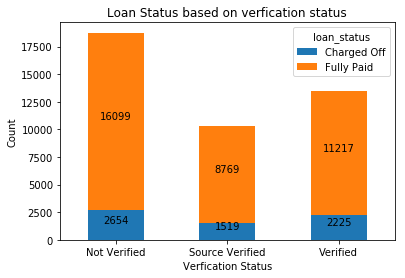

In [17]:
#group by verification status and loan status
loan_stat_ver = loan.groupby(['verification_status',"loan_status"]).size()

#plot the figure
ver_plt = loan_stat_ver.unstack().plot(kind = "bar",stacked = True, rot = 0)
plt.title("Loan Status based on verfication status")
plt.xlabel('Verfication Status')
plt.ylabel('Count')

#bar toppers
for p in ver_plt.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ver_plt.text(x + width/2, 
                  y + height/2, 
                  '{:.0f}'.format(height), 
                  horizontalalignment = 'center',
                  verticalalignment = 'bottom')

From the graph, suprisingly most of the loans approved are not verified and the number of charged off loans are more for non-verified status. 

**Loan status based on term**

Lending Club approves its loan in either of the to terms: 36 months or 60 months. 

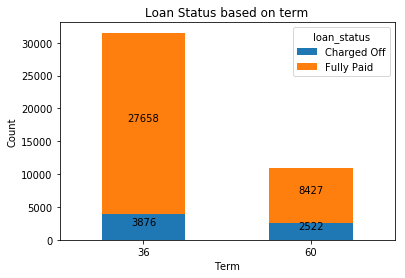

In [18]:
#group term and loan status
loan_stat_ver = loan.groupby(['term',"loan_status"]).size()

#plot the figure
term_plt = loan_stat_ver.unstack().plot(kind = "bar",stacked = True, rot = 0)
plt.title("Loan Status based on term")
plt.xlabel('Term')
plt.ylabel('Count')

#bar toppers
for p in term_plt.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    term_plt.text(x + width/2, 
                  y + height/2, 
                  '{:.0f}'.format(height), 
                  horizontalalignment = 'center',
                  verticalalignment = 'bottom')

From the above graph:

1. Most of the loans are 36months term compared to 60 months.
2. The number of charged off loans are more in 36 months than 60 months term. 

**Loan status per year**

The data used in this project has data from 2007-2011. Lets plot the loan statues for each year and study the graph.

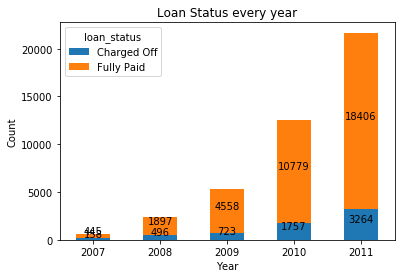

In [19]:
#group year and loan status
loan_stat_ver = loan.groupby(['year',"loan_status"]).size()

#plot the figure
year_plt = loan_stat_ver.unstack().plot(kind = "bar",stacked = True, rot = 0)
plt.title("Loan Status every year")
plt.xlabel('Year')
plt.ylabel('Count')

#bar toppers
for p in year_plt.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    year_plt.text(x + width/2, 
                  y + height/2, 
                  '{:.0f}'.format(height), 
                  horizontalalignment = 'center',
                  verticalalignment = 'bottom')

1. The number of loans that are fully paid and charged off increases year by year.
2. From the graph,the percentage of loans charged off per year are: 
    2007: 26%, 2008: 20%, 2009: 13%, 2010: 14%, 2011: 15%.
    This shows there is decrease in charged off loans though the number of loans has increased.
3. As the year passes, the number of loans approved increases and it is seen that there is an increase in number of charged off loans.

**How does term affect loan amount and interest rate**

Text(0, 0.5, 'Interest Rate')

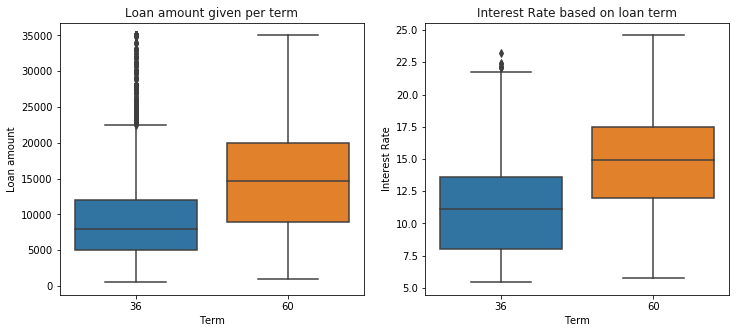

In [20]:
fig, axs = plt.subplots(ncols = 2)

#box plot for loan amount and term
boxplot = sns.boxplot(y = 'loan_amnt', x = 'term', data = loan, ax = axs[0])
boxplot.figure.set_size_inches(12,5)
boxplot.set_title('Loan amount given per term', fontsize = 12, color = "black", alpha = 0.9)
boxplot.set_xlabel('Term')
boxplot.set_ylabel('Loan amount')

#box plot for interest rate and term
boxplot1 = sns.boxplot(y = 'int_rate', x = 'term', data = loan, ax = axs[1])
boxplot1.figure.set_size_inches(12,5)
boxplot1.set_title('Interest Rate based on loan term', fontsize = 12, color = "black", alpha = 0.9)
boxplot1.set_xlabel('Term')
boxplot1.set_ylabel('Interest Rate')

1. The 36 months term have a loan amount approved between 5,000 - 12,000 with average of about 7,000 where as 60 months term has 10,000 - 20,000 loan amount with 15,000 of average.
2. The interest rates are less for 36 months with an average of 11% and 15% for 60 months term.
2. This shows lower the term, lower is the loan amount approved and interest rates.

**How does the loan approval process effect based on purpose of the loan?**

In [21]:
#pivot table for purpose/loan statues against installment/int_rate/loan_amnt
purpose_loan_stat = np.round(pd.pivot_table(loan, values=["installment",'int_rate',"loan_amnt"], index=['purpose', 'loan_status'],
                       aggfunc = {"installment" : np.mean,
                                  "int_rate" : np.mean,
                                  "loan_amnt" : np.mean}),2)
purp_loan_stat = pd.DataFrame(data = purpose_loan_stat)
purp_loan_stat

installment  int_rate  loan_amnt
purpose            loan_status                                  
car                Charged Off       206.08     12.40    7361.71
                   Fully Paid        188.79     10.44    6688.18
credit_card        Charged Off       357.06     13.51   12754.98
                   Fully Paid        344.06     11.63   11460.24
debt_consolidation Charged Off       366.59     14.33   13165.34
                   Fully Paid        363.57     12.28   12437.83
educational        Charged Off       233.14     13.33    7337.78
                   Fully Paid        209.78     11.80    6439.15
home_improvement   Charged Off       327.95     13.45   11505.02
                   Fully Paid        319.42     11.31   11359.51
house              Charged Off       334.23     15.26   11910.00
                   Fully Paid        364.31     11.83   12653.31
major_purchase     Charged Off       256.18     13.02    9059.18
                   Fully Paid        232.53     10.77    7964.47
medical            Charged Off       236.00     13.42    8208.40
                   Fully Paid        233.96     11.32    8111.34
moving             Charged Off       178.62     12.63    5969.16
                   Fully Paid        199.14     11.57    6723.18
other              Charged Off       236.80     13.60    8184.75
                   Fully Paid        234.81     11.65    7893.53
renewable_energy   Charged Off       248.97     12.39    8250.00
                   Fully Paid        248.13     11.33    8719.48
small_business     Charged Off       419.50     14.34   14699.86
                   Fully Paid        383.60     12.70   13243.72
vacation           Charged Off       161.60     11.70    5812.29
                   Fully Paid        161.68     10.79    5360.44
wedding            Charged Off       309.62     13.62   10551.83
                   Fully Paid        288.22     11.84    9655.36

In [22]:
#count of loans based on purpose 
loan.groupby(['purpose']).size().sort_values(ascending = False).reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
purpose,debt_consolidation,credit_card,other,home_improvement,major_purchase,small_business,car,wedding,medical,moving,house,educational,vacation,renewable_energy
0,19748,5473,4419,3193,2310,1988,1615,1004,752,629,425,422,399,106


1. The highest amount of loan approved is for the small business and the least if for vacation. 
2. The highest interest rate is at 15% for house and least at 10.44% for car loans.
3. The highest number of loans approved are for debt_consolidation and the least is for renewable energy.
4. Majority of the charged off loans have higher installment, loan amount and interest rate compared to fully paid loans. This shows higher the amount,interest rate and installments higher are the changes that the loan is charged off.

**How does the loan approval process effect based on home ownership of the loan?**

In [23]:
#pivot table for home_onership/loan statues against installment/int_rate/loan_amnt
home_loan_stat = np.round(pd.pivot_table(loan, values=["installment",'int_rate',"loan_amnt"], index=['home_ownership', 'loan_status'],
                       aggfunc = {"installment" : np.mean,
                                  "int_rate" : np.mean,
                                  "loan_amnt" : np.mean}),2)
home_own_loan_stat = pd.DataFrame(data = home_loan_stat)
home_own_loan_stat

installment  int_rate  loan_amnt
home_ownership loan_status                                  
MORTGAGE       Charged Off       377.91     13.91   13747.19
               Fully Paid        352.49     11.61   12367.07
NONE           Charged Off       524.77     15.65   15000.00
               Fully Paid        188.18      8.20    6000.00
OTHER          Charged Off       350.94     13.79   10735.34
               Fully Paid        302.63     12.49    9472.90
OWN            Charged Off       309.16     13.80   10958.96
               Fully Paid        297.19     11.58   10042.37
RENT           Charged Off       298.07     13.94   10318.43
               Fully Paid        294.24     12.12    9756.98

In [24]:
#count of loans based on home ownership 
loan.groupby(['home_ownership']).size().sort_values(ascending = False).reset_index().T

,0,1,2,3,4
home_ownership,RENT,MORTGAGE,OWN,OTHER,NONE
0,20160,18931,3248,136,8


1. The loan amount, interest rate and installements are highest for home ownership = None.
2. Just as observed in purpose feature, the higher the amount, interest rate and installment greater are the changes that the loans are charges off.
3. The number of people with home ownership of Rent is highest with None having the least number of people.

**How does the loan approval process effect based on employement title and length of the loan?**

Text(0, 0.5, 'Loan amount in $')

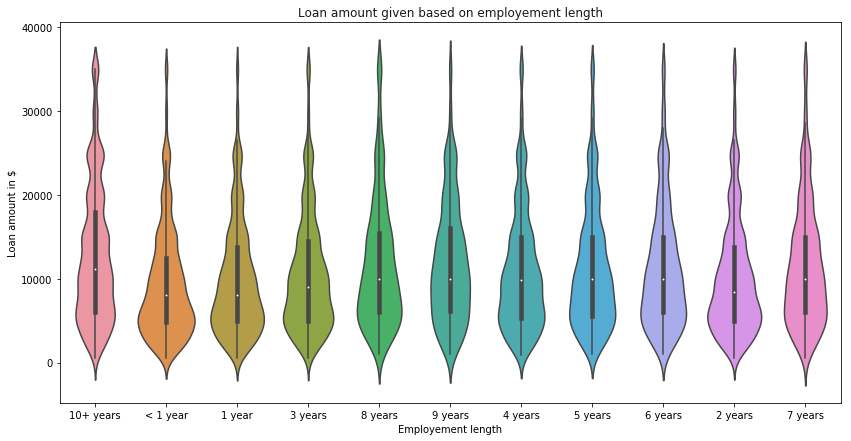

In [25]:
#violinplot for loan amount and emp_length
violinplot = sns.violinplot(y = 'loan_amnt', x = 'emp_length', data = loan)
violinplot.figure.set_size_inches(14,7)
violinplot.set_title('Loan amount given based on employement length', fontsize = 12, color = "black", alpha = 0.9)
violinplot.set_xlabel('Employement length')
violinplot.set_ylabel('Loan amount in $')

1. The loans approved dont vary a lot with employment length as majority of amount is less than 10,000. 
2. However more borrowers with employment length of more than 10 years compared to others have loan amounts more than 30,000.
3. The interest rate seems to be in the same range irrespective of the employment length.

**Determine the ratio of fully paid to charged off loans with loan amount and interest rates in different states in the USA.**

In [26]:
#install chart studio module
!pip install chart_studio

You should consider upgrading via the 'pip install --upgrade pip' command.


In [27]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
import pandas as pd

**Plot a map for Fully paid loans**

In [28]:
#find the average loan amount and interest rate per state 
loc_loan = loan.groupby(["addr_state"])["loan_amnt","int_rate"].apply(lambda x : round(x.mean(),2))

#create a new loan_stat column to find percentage of fully paid loans 
loc_loan["fully_paid"] =  loan.groupby('addr_state')['loan_status'].apply(lambda x : round(((x == 'Fully Paid').sum()/
                                                                                    ((x == 'Fully Paid').sum() + 
                                                                                    (x == 'Charged Off').sum()))
                                                                                   *100,2))

#create a new loan_stat column to find percentage of charged off loans 
loc_loan["charged_off"] =  loan.groupby('addr_state')['loan_status'].apply(lambda x : round(((x == 'Charged Off').sum()/
                                                                                    ((x == 'Fully Paid').sum() + 
                                                                                    (x == 'Charged Off').sum()))
                                                                                    *100,2))

loc_loan = loc_loan.reset_index()

#create a display_text column to display on the graph
loc_loan["fully_paid_text"] = "State:" + loc_loan["addr_state"].astype(str) + "<br>" + 'Average Loan amount:' +\
                            loc_loan['loan_amnt'].apply(str) + "$" + "<br>" +'Average Interest Rate: ' +\
                            loc_loan['int_rate'].apply(str)

#create a display_text column to display on the graph
loc_loan["charged_off_text"] = "State:" + loc_loan["addr_state"].astype(str) + "<br>" + 'Average Loan amount:' +\
                            loc_loan['loan_amnt'].apply(str) + "$" + "<br>" +'Average Interest Rate: ' +\
                            loc_loan['int_rate'].apply(str)

#check the newly created data
loc_loan.head(3)


,addr_state,loan_amnt,int_rate,fully_paid,charged_off,fully_paid_text,charged_off_text
0,AK,12913.95,12.86,80.23,19.77,State:AK<br>Average Loan amount:12913.95$<br>A...,State:AK<br>Average Loan amount:12913.95$<br>A...
1,AL,11173.30,11.96,87.19,12.81,State:AL<br>Average Loan amount:11173.3$<br>Av...,State:AL<br>Average Loan amount:11173.3$<br>Av...
2,AR,10369.83,11.75,86.97,13.03,State:AR<br>Average Loan amount:10369.83$<br>A...,State:AR<br>Average Loan amount:10369.83$<br>A...


In [29]:
#create a map dictionary
map_data = dict(type = 'choropleth',
            locations = loc_loan["addr_state"],
            locationmode = 'USA-states',
            colorscale = 'Portland',
            text = loc_loan["fully_paid_text"],
            z = loc_loan["fully_paid"],
            colorbar = dict(title = "USA States"),
           )

In [30]:
#set the map geography to USA
map_layout = dict(geo = {'scope':'usa'})

In [31]:
#set the Figure parameters with data and USA map layout
map_actual = go.Figure(data = [map_data], layout = map_layout)

In [32]:
#plot the map
iplot(map_actual)

From the above map:

1. The legend shows that there are states with 100% loans repaid and the least percentage is around 45%.
2. This map shows the Nebraska having least number of Fully Paid loans at 45% and Maine having 100% loans that are Fully paid. And majority of the other states have between 80-90% of the loans that are fully paid. 

**Plot a map for Charged Off loans**

In [33]:
#create a map dictionary
map_data_co = dict(type = 'choropleth',
            locations = loc_loan["addr_state"],
            locationmode = 'USA-states',
            colorscale = 'Portland',
            text = loc_loan["charged_off_text"],
            z = loc_loan["charged_off"],
            colorbar = dict(title = "USA States")
           )

In [34]:
#set the Figure parameters with data and USA map layout
map_actual_co = go.Figure(data = [map_data_co], layout = map_layout)

In [35]:
#plot the map
iplot(map_actual_co)

From the above map:

1. The legend shows that there are states with highest of 50% loans charged off and the least percentage is 0.
2. This map shows the Nebraska having highest number of Charged Off loans at 54% and Maine having 0% loans that are Charged Off. These states had the lowest and highest fully paid loans respectively. This shows Nebraska borrowers tend to charge off their loans and the lenders need to think before approving the loans.
3. Majority of the other states have between 10-20% of the loans that are charged off. 